# Analytics DataCube

> 👋 Before moving on with this demo, you must first sign-up and request your Geosys APIs credentials here :
> - ⚙️[Try it now](https://earthdailyagro.com/geosys-registration/)

> For more information about our Geosys APIs : 
> - 📚 [Geosys APIs to connect with your digital ag application](https://app.geosys.com/#/documentation)


> **Demo Project:** This demo demonstrates the ability to create an Analytics Datacube of CLEAR images based on geosysPy.
The generated output is a zarr file  available on the selected cloud storage provider. (AWS/Azure Blob Storage)



### @author: Geosys



 ## 1️⃣ Import all librairies needed and get an autorization to use Analytics Datacube

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy import Geosys
from geosyspy.utils.constants import *
from dotenv import load_dotenv
from datetime import datetime
from dateutil.relativedelta import relativedelta
from analytics_datacube.processor import AnalyticsDatacube
from analytics_datacube.utils import dataset_to_zarr_format
import datetime as dt
import logging
import xarray
from cloud_storage import cloud_storage_aws,cloud_storage_azure

logger = logging.getLogger()
#logger.setLevel(logging.ERROR)
logger.setLevel(logging.WARNING)

# read .env file
load_dotenv()

API_CLIENT_ID = os.getenv('API_CLIENT_ID')
API_CLIENT_SECRET = os.getenv('API_CLIENT_SECRET')
API_USERNAME = os.getenv('API_USERNAME')
API_PASSWORD = os.getenv('API_PASSWORD')


# Create and initialize the client
print("Initializing the client...")
client = AnalyticsDatacube(API_CLIENT_ID, API_CLIENT_SECRET, API_USERNAME, API_PASSWORD, Env.PROD, Region.NA)
print("Client initialized !")

Initializing the client...
Client initialized !


 ## 2️⃣ Input data

These input parameters are utilized in the demo to generate Analytics DataCube


##### polygon: 
A polygon string in WKT or GeoJson format. This polygon defines the boundaries of the area under analysis.

#### start_date: 
A datetime object representing the start date of generated DataCube.

#### end_date: 
A datetime object representing the end date of generated  DataCube

#### indicators: 
A string array representing index indicators on wich the analysis is made.
Possible values for indicator are:
- ndvi
- evi
- gndvi
- ndwi
- cvi
- cvin
- lai

In [2]:
# WKT 
#polygon = "POLYGON((-90.41 41.6663, -90.41 41.6545, -90.3775 41.6541, -90.3778 41.6660, -90.41 41.6663))"
polygon ="POLYGON((-90.41169914 41.66631642, -90.41178502 41.6545818, -90.37753855 41.65413284, -90.37788188 41.666059940000004, -90.41169914 41.66631642))"
# GeoJson
#polygon = '{"type": "Polygon","coordinates": [[[-90.41, 41.6663],[-90.41, 41.6545],[-90.3775, 41.6541],[-90.3778, 41.666],[-90.41, 41.6663]]]}'

endDate = dt.date.today()

startDate = endDate + relativedelta(months=-12)

indicators = ["NDVI", "NDWI", "EVI"]

## 3️⃣ Generate the analytics datacube
Generate an analytics datacube compute on each index values by pixel over the defined period for the specified polygon. 

In [3]:
analytics_datacube = client.generate_analytics_datacube(polygon, startDate, endDate, indicators)
analytics_datacube

C:\Users\jpn\AppData\Local\anaconda3\envs\analytics_datcube_v2\Lib\site-packages\geosyspy\geosys.py:241: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_coverage["image.date"] = pd.to_datetime(


The highest resolution's image grid size is (288, 149)


C:\Users\jpn\AppData\Local\anaconda3\envs\analytics_datcube_v2\Lib\site-packages\geosyspy\geosys.py:241: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_coverage["image.date"] = pd.to_datetime(


The highest resolution's image grid size is (288, 149)


C:\Users\jpn\AppData\Local\anaconda3\envs\analytics_datcube_v2\Lib\site-packages\geosyspy\geosys.py:241: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_coverage["image.date"] = pd.to_datetime(


The highest resolution's image grid size is (288, 149)


<xarray.Dataset>
Dimensions:                  (band: 3, y: 149, x: 288, time: 27)
Coordinates:
  * band                     (band) <U4 'EVI' 'NDVI' 'NDWI'
  * y                        (y) float64 41.67 41.67 41.67 ... 41.65 41.65 41.65
  * x                        (x) float64 -90.41 -90.41 -90.41 ... -90.38 -90.38
  * time                     (time) datetime64[ns] 2023-03-14 ... 2023-11-17
    image.id                 (time) <U43 'IKc73hpUQ6x1Sr4eAfaz4GTAJstzl7ToBqz...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'BARE' 'VEGETATION' ... 'BARE' 'BARE'
    image.spatialResolution  (time) float64 10.0 10.0 10.0 ... 15.0 15.0 15.0
    image.weather            (time) <U4 'COLD' 'WET' 'WET' ... 'DRY' 'HOT' 'HOT'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'
Data variables:
    ndvi                     (time, band, y, x) float64 nan nan nan ... nan nan
    ndwi                     (time, band, y, x) float64 nan nan nan ... nan nan
    evi                      (time, band, y, x) float64 nan nan nan ... nan nan

## 4️⃣ Save the generated analytics DataCube in a Zarr file

In [4]:
# Save as zarr
zarr_path = dataset_to_zarr_format(analytics_datacube)
zarr_path

'C:\\Users\\jpn\\AppData\\Local\\Temp\\2024-02-21_18-09-41_analytics-datacube.zarr'

## 5️⃣ Upload result on Cloud Storage accounts


### Upload on AWS Cloud Storage

In [5]:
if cloud_storage_aws.upload_folder_to_aws_s3(zarr_path):
    print("Analytics DataCube uploaded to AWS")
    print(f'S3 uri: {cloud_storage_aws.get_s3_uri_path(zarr_path)}')
else:
    print("Issue to upload Analytics DataCube on AWS")

Analytics DataCube uploaded to AWS
S3 uri: s3://byoa-demo/2024-02-21_18-09-41_analytics-datacube.zarr


### Upload on Azure Cloud Storage 

In [6]:
if cloud_storage_azure.upload_directory_to_azure_blob_storage(zarr_path):
    print("Analytics DataCube uploaded to Azure Blob Storage")
    print(f'Azure Blob url: {cloud_storage_azure.get_azure_blob_url_path(zarr_path)}')

else:
    print("Issue to upload Analytics DataCube on Azure Blob Storage")

ERROR:root:Error while uploading file to Azure: Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:c879e33d-d01e-0096-33e8-643852000000
Time:2024-02-21T17:10:59.2138833Z
ErrorCode:AuthenticationFailed
authenticationerrordetail:Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:10:59 GMT]
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>AuthenticationFailed</Code><Message>Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:c879e33d-d01e-0096-33e8-643852000000
Time:2024-02-21T17:10:59.2138833Z</Message><AuthenticationErrorDetail>Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:10:59 GM

ERROR:root:Error while uploading file to Azure: Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:5d0f4927-201e-00e5-6fe8-644891000000
Time:2024-02-21T17:11:07.0752088Z
ErrorCode:AuthenticationFailed
authenticationerrordetail:Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:07 GMT]
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>AuthenticationFailed</Code><Message>Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:5d0f4927-201e-00e5-6fe8-644891000000
Time:2024-02-21T17:11:07.0752088Z</Message><AuthenticationErrorDetail>Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:07 GM

ERROR:root:Error while uploading file to Azure: Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:d0436531-201e-0022-36e8-643450000000
Time:2024-02-21T17:11:16.0576234Z
ErrorCode:AuthenticationFailed
authenticationerrordetail:Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:16 GMT]
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>AuthenticationFailed</Code><Message>Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:d0436531-201e-0022-36e8-643450000000
Time:2024-02-21T17:11:16.0576234Z</Message><AuthenticationErrorDetail>Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:16 GM

ERROR:root:Error while uploading file to Azure: Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:a91b91cc-401e-00dc-23e8-640835000000
Time:2024-02-21T17:11:24.0284129Z
ErrorCode:AuthenticationFailed
authenticationerrordetail:Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:24 GMT]
Content: <?xml version="1.0" encoding="utf-8"?><Error><Code>AuthenticationFailed</Code><Message>Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
RequestId:a91b91cc-401e-00dc-23e8-640835000000
Time:2024-02-21T17:11:24.0284129Z</Message><AuthenticationErrorDetail>Signature not valid in the specified time frame: Start [Mon, 31 Jul 2023 11:57:16 GMT] - Expiry [Fri, 29 Sep 2023 22:00:00 GMT] - Current [Wed, 21 Feb 2024 17:11:24 GM

KeyboardInterrupt: 

##  6️⃣ Display the results
Visualize the results using matplotlib

### Time series for each indexes

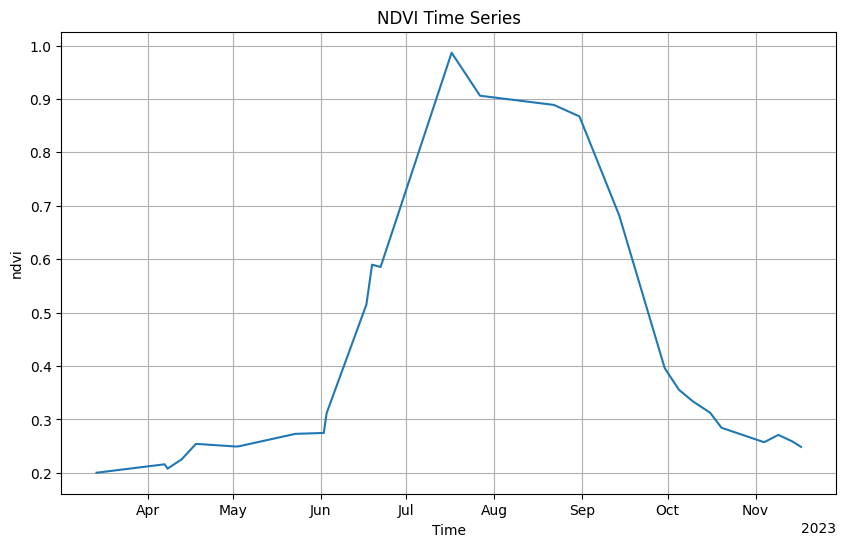

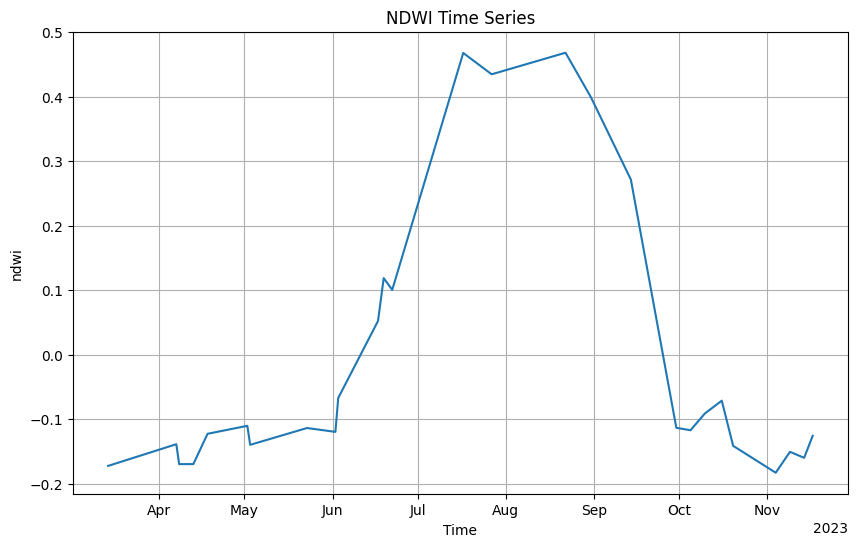

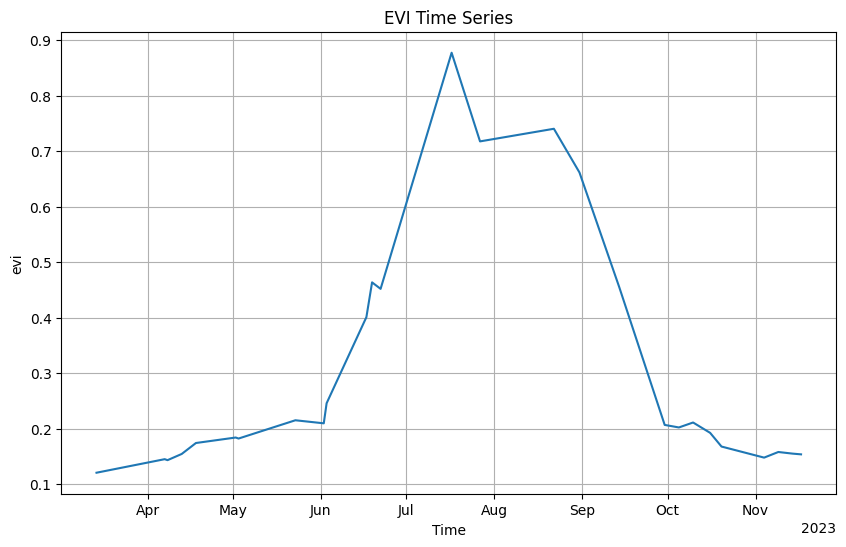

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# get list of available bands from the analytics datacube
bands = list(analytics_datacube.data_vars.keys())

for band in bands:
    plt.figure(figsize=(10, 6))
    indicator_ds = analytics_datacube.sel(band=band.upper())[band].sortby('time')

    # Exclude NaN values to calculate the mean
    masked_data_array = indicator_ds.where(~np.isnan(indicator_ds))

    # index mean calculation
    mean_index = masked_data_array.mean(dim=['x', 'y'])

    # plot 
    mean_index.plot.line(x='time')

    # labels & title
    plt.xlabel('Time')
    plt.ylabel(band)
    plt.title(f'{band.upper()} Time Series')
    plt.grid()    
    plt.show()

### Cumulative index indicator values over the defined period.

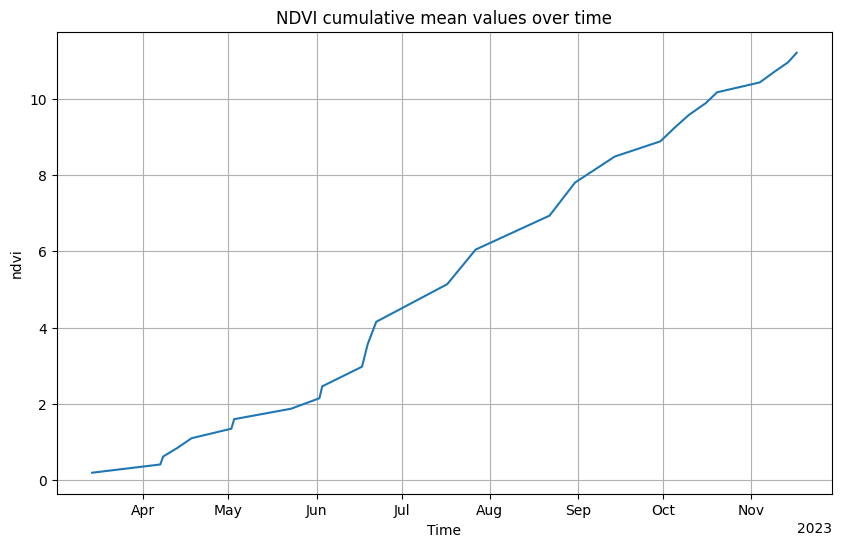

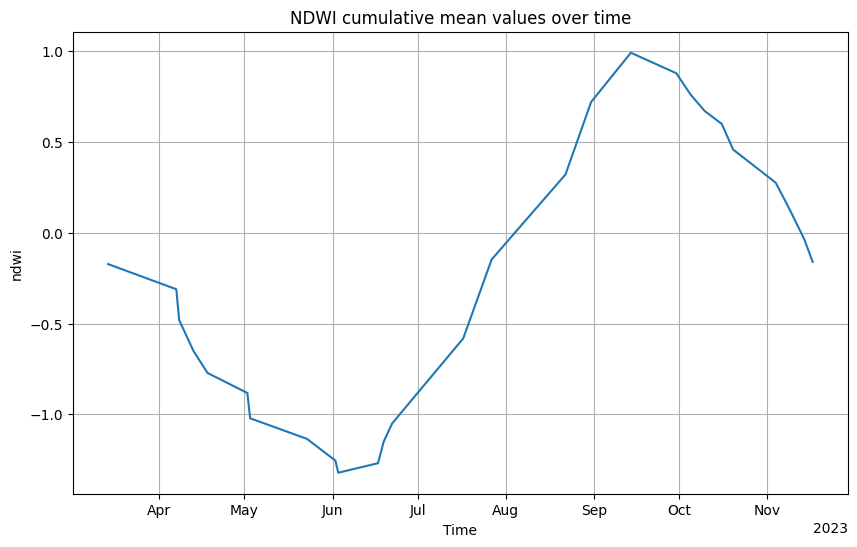

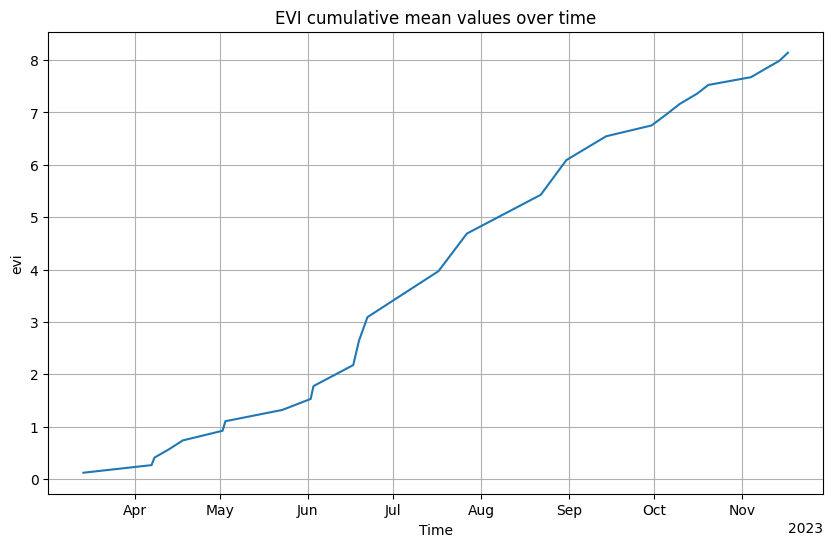

In [8]:
# get list of available bands from the analytics datacube
bands = list(analytics_datacube.data_vars.keys())

for band in bands:
    plt.figure(figsize=(10, 6))
    indicator_ds = analytics_datacube.sel(band=band.upper())[band].sortby('time')

    # Exclude NaN values to calculate the mean
    masked_data_array = indicator_ds.where(~np.isnan(indicator_ds))

    # index mean calculation
    mean_index = masked_data_array.mean(dim=['x', 'y'])

    # cumsum mean index calculation
    cumul_index_ds = mean_index.cumsum(dim='time')

    # plot 
    cumul_index_ds.plot.line(x='time')

    # labels & title
    plt.xlabel('Time')
    plt.ylabel(band)
    plt.title(f'{band.upper()} cumulative mean values over time')
    plt.grid()    
    plt.show()